In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (16).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (4).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (5).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (12).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (7).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (6).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (9).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (1).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (2).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (5).jpeg
/kaggle/input/agricultural-crops-image-classification

In [2]:
agri_crops = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/'

In [3]:
import os
os.listdir(agri_crops)[:]

['tomato',
 'chilli',
 'clove',
 'pineapple',
 'vigna-radiati(Mung)',
 'Olive-tree',
 'coconut',
 'papaya',
 'Tobacco-plant',
 'jute',
 'jowar',
 'gram',
 'tea',
 'maize',
 'wheat',
 'soyabean',
 'Pearl_millet(bajra)',
 'Lemon',
 'Fox_nut(Makhana)',
 'mustard-oil',
 'sugarcane',
 'almond',
 'Cucumber',
 'sunflower',
 'cotton',
 'banana',
 'Cherry',
 'cardamom',
 'rice',
 'Coffee-plant']

In [4]:
os.listdir(os.path.join(agri_crops,'tomato'))[:]

['image (16).jpeg',
 'image (4).jpeg',
 'image (5).jpg',
 'image (12).jpeg',
 'image (7).jpg',
 'image (6).jpg',
 'image (9).jpg',
 'image (1).jpeg',
 'image (2).jpg',
 'image (5).jpeg',
 'image (4).jpg',
 'image (6).jpeg',
 'image (13).jpeg',
 'image (8).jpeg',
 'image (9).jpeg',
 'image (15).jpeg',
 'image (7).jpeg',
 'image (8).jpg',
 'image (10).jpeg',
 'image (14).jpeg',
 'image (2).jpeg',
 'image (1).jpg',
 'image (3).jpg',
 'image (10).jpg',
 'image (3).jpeg',
 'image (11).jpeg']

In [5]:
os.listdir(os.path.join(agri_crops,'Coffee-plant'))[:]

['images77.jpg',
 'images68.jpg',
 'images69.jpg',
 'images59.jpg',
 'images54.jpg',
 'images58.jpg',
 'images40.jpg',
 'images29.jpg',
 'images41.jpg',
 'images16.jpg',
 'images64.jpg',
 'images71.jpg',
 'images62.jpg',
 'images24.jpg',
 'images10.jpg',
 'images48.jpg',
 'images53.jpg',
 'images80.jpg',
 'images55.jpg',
 'images7.jpg',
 'images74.jpg',
 'images15.jpg',
 'images47.jpg',
 'images67.jpg',
 'images13.jpg',
 'images8.jpg',
 'images9.jpg',
 'images50.jpg',
 'images61.jpg']

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Dropout,Conv2D,BatchNormalization,GlobalAveragePooling2D
from keras.applications import InceptionV3
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [7]:
img_gen = ImageDataGenerator(rescale=(1/255.),validation_split=0.1,rotation_range=20,
                            zoom_range=0.1,horizontal_flip=True,)
train_df = img_gen.flow_from_directory(agri_crops,target_size=(256,256),shuffle=True,
                                                 color_mode='rgb',batch_size=32,
                                      subset='training',class_mode='binary')
val_df = img_gen.flow_from_directory(agri_crops,target_size=(256,256),shuffle=True,
                                                 color_mode='rgb',batch_size=32,
                                      subset='validation',class_mode='binary')

Found 757 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


In [8]:
transfer_model = InceptionV3(include_top=False,input_shape=(256,256,3))

transfer_model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)           

In [9]:
transfer_model.trainable=True
set_trainable = False
for i in transfer_model.layers:
    if i.name == 'conv2d_93' or i.name=='conv2d_87' or i.name== 'conv2d_88' or i.name=='conv2d_91' or i.name=='conv2d_92' or i.name=='conv2d_89' or i.name=='conv2d_86':
        set_trainable=True
    else:
        i.trainable=False
for  i in transfer_model.layers:
    print(i.name,i.trainable)
        

input_1 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
activati

In [10]:
model_1 = Sequential([
    transfer_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(256,activation='elu',kernel_regularizer=tf.keras.regularizers.L2(0.001),kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128,activation='elu',
                kernel_regularizer=tf.keras.regularizers.L2(0.001),kernel_initializer='he_normal'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64,activation='elu',
                kernel_regularizer=tf.keras.regularizers.L2(0.001),kernel_initializer='he_normal'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(30,activation='softmax')],name='model_1')

In [11]:
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
callback= [ModelCheckpoint('model_1.h5',save_best_only=True),EarlyStopping(patience=5,monitor='val_accuracy',mode='auto',restore_best_weights=True,)]

In [13]:
model_history=model_1.fit(train_df,validation_data=val_df,batch_size=8,epochs=50,callbacks=callback)

Epoch 1/50
24/24 [==============================] - 41s 1s/step - loss: 3.5965 - accuracy: 0.3052 - val_loss: 4.9885 - val_accuracy: 0.2778
Epoch 2/50
24/24 [==============================] - 20s 834ms/step - loss: 2.5274 - accuracy: 0.5760 - val_loss: 3.1516 - val_accuracy: 0.4583
Epoch 3/50
24/24 [==============================] - 19s 794ms/step - loss: 1.9980 - accuracy: 0.7503 - val_loss: 2.4223 - val_accuracy: 0.5556
Epoch 4/50
24/24 [==============================] - 20s 833ms/step - loss: 1.6301 - accuracy: 0.8507 - val_loss: 2.0194 - val_accuracy: 0.7083
Epoch 5/50
24/24 [==============================] - 19s 800ms/step - loss: 1.4250 - accuracy: 0.8864 - val_loss: 2.2051 - val_accuracy: 0.6111
Epoch 6/50
24/24 [==============================] - 19s 799ms/step - loss: 1.2710 - accuracy: 0.9234 - val_loss: 1.9673 - val_accuracy: 0.6806
Epoch 7/50
24/24 [==============================] - 19s 805ms/step - loss: 1.1091 - accuracy: 0.9445 - val_loss: 1.9353 - val_accuracy: 0.7222
Ep

In [14]:
from keras.models import load_model
model = load_model('./model_1.h5')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_94 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0   

Text(0.5, 1.0, 'loss vs val_loss')

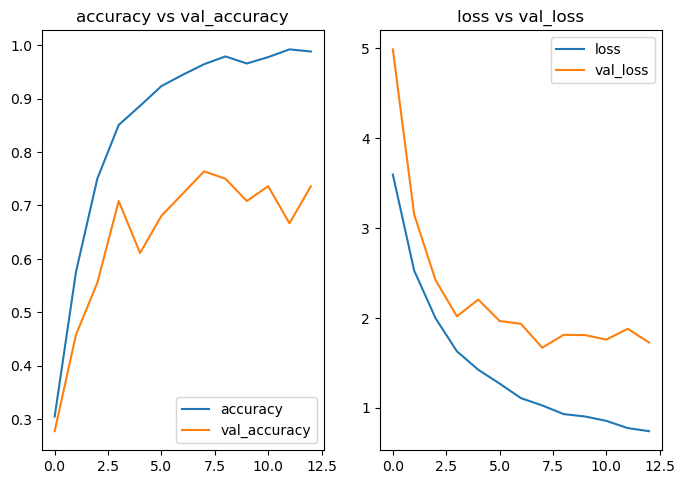

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))

plt.subplot(2,2,1)
plt.plot(model_history.history['accuracy'],label='accuracy')
plt.plot(model_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('accuracy vs val_accuracy')

plt.subplot(2,2,2)
plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_loss'],label='val_loss')
plt.legend()
plt.title('loss vs val_loss')